# 차원 축소  
<br>

## 차원 축소(Dimension Reduction)의 개요  
**차원 축소** : 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트 생성. 2개로 분류 가능. 
  1) **피처 선택(feature selection)** : 종속성이 강하고 불필요한 피처 제거, 주요 피처 선택.  
  2) **피처 추출** : 기존 피처를 저차원의 중요 피처로 압축해서 추출.(잠재적인 요소 추출)  
   ex) 학생 스펙 -> 학업 성취도, 리더쉽 등으로 함축  
   
<br>
일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고 희소(space)한 구조를 가지게 된다. 
수백 개 이상의 피처로 구성된 데이터 세트의 경우 고차원일수록 예측 신뢰도가 떨어진다.  

- 대표적인 차원 축소 알고리즘  
 1) PCA  
 2) LDA  
 3) SVD  
 4) NMF  
대표적 쓰임으로 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있고  
텍스트 문서의 숨겨진 의미를 추출할 수 있다.
<br>  



## PCA(Principal Component Analysis)  

### PCA 개요
**PCA**는 가장 대표적인 차원 축소 기법으로, **여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법**이다.  
<br>
PCA로 차원을 축소할 때 기존 데이터의 정보 유실이 최소화되는 것은 당연하고 이를 위해 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다. **즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주한다**  


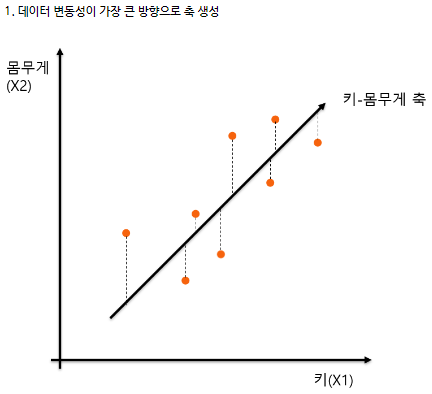  
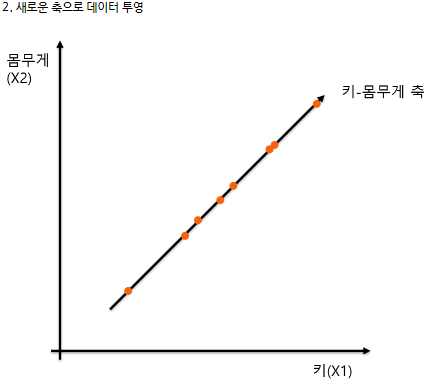  
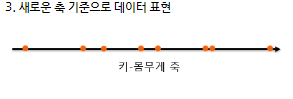

**PCA의 축 생성**  
1) 첫 번째 벡터 축 :가장 큰 데이터 변동성을 기반으로 생성.  
2) 두 번째 벡터 축 : 이 벡터 축에 직각이 되는 벡터(=직교 벡터)  
3) 세 번째 벡터 축 : 두 번째 축과 직각이 되는 벡터  
<br> 
이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소된다.

PCA, 즉 주성분 분석은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법이다.  
<br>
PCA를 **선형대수 관점**에서 해석해보면, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고,  
이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다.

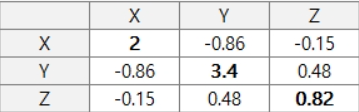
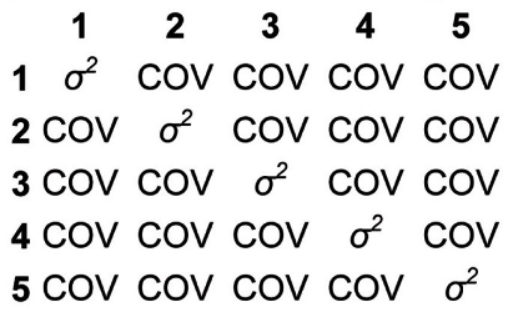

위 표에서 **공분산 행렬**에서 대각선 원소는 각 변수의 분산을 의미하며, 대각선 이외의 원소는 **가능한 모든 변수 쌍 간의 공분산**을 의미한다.  
공분산 행렬은 **정방행렬**이며 **대칭행렬**이다.  
대칭행렬은 고유값 분해와 관련하여 항상 고유벡터를 직교행렬로, 고유값을 정방 행렬로 대각화할 수 있다는 것이다.

**고유값과 고유벡터 구하기**
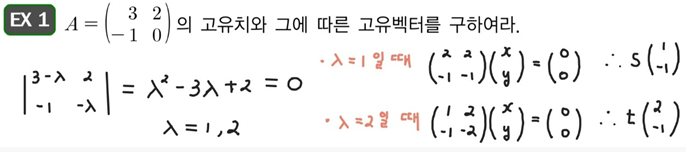

선형대수식까지 써가면서 강조하고 싶었던 것은 **입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며,  
이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA라는 것이다.**  
PCA는 다음과 같은 스텝으로 수행된다.  
1. 입력 데이터 세트의 공분산 행렬을 생성한다.
2. 공분산 행렬의 고유벡터와 고유값을 계산한다.  
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출한다.  
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.  

PCA는 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것이다.  
**붓꽃데이터 세트를 이용해 4개의 속성을 2개의 PCA차원으로 압축해 보겠다.**

In [1]:
## 붓꽃 데이터를 로딩한 뒤 이 데이터를 DataFrame으로 시각화
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


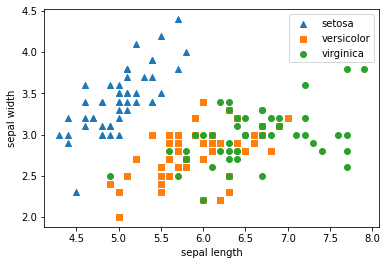

In [2]:
## 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시  
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
## 붓꽃 데이터 세트에 바로 PCA를 적용하기 전에 개별 속성을 함께 스케일링

from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [4]:
## 스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원의 붓꽃 데이터를 2차원 PCA 데이터로 변환

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transfom()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
## 위를 DataFrame으로 변환한 뒤 데이터값 확인

# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


p.407

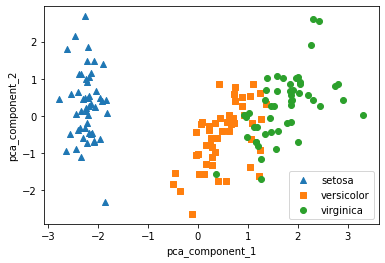

In [6]:
## 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화

# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

p.407

PCA로 변환한 후에도 pca_component_1 축을 기반으로 비교적 잘 구분되었다.
setosa 품종은 명확하게 구분이 가능하고 Versicolor와 Virginica는 겹치는 부분이 일부 존재한다.

In [7]:
## PCA Component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 확인

print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


전체 변동성의 차지율  
pca_component_1 = 92.9%  
pca_component_2 = 22.8%

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

원본 붓꽃 데이터 세트와 PCA로 변환된 원본 데이터 세트에 각각 분류를 적용한 후 결과를 비교해 보겠다.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도 : ', scores)
print('원본 데이터 평균 정확도 : ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 :  [0.98 0.94 0.96]
원본 데이터 평균 정확도 :  0.96


In [9]:
## 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 **랜덤 포레스트**를 적용

pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없다.  
위 붓꽃 데이터 경우는 4개의 속성이 2개의 변환 속성으로 감소하면서 예측 성능의 정확도가 원본 데이터 대비 약 8& 하락했다.  

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

좀 더 많은 피처를 가진 **신용카드 고객 데이터 세트**를 적은 PCA 컴포넌트 기반으로 변환한 뒤, 예측 영향도가  
어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교해 보겠다. 

In [10]:
## pca_credit_card.xls 데이터 세트를 DataFrame으로 로딩

# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


신용카드 데이터 세트 = 30,000개의 레코드와 24개의 속성  
'default payment next month' : 다음달 연체 여부  
연체 여부 : 연체 = 1, 정상납부 =0  

In [11]:
# PAY_0 -> PAY_1 칼럼명 변환
# default payment next month -> default 칼럼명 변환

df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

해당 데이터 세트는 23개의 속성 데이터 세트가 있으나 각 속성끼리 상관도가 매우 높다.  
DataFrame의 corr()를 이용해 **각 속성 간의 상관도**를 구한 뒤 이를 **시본(seaborn)의 heatmap**으로 시각화하겠다.

<AxesSubplot:>

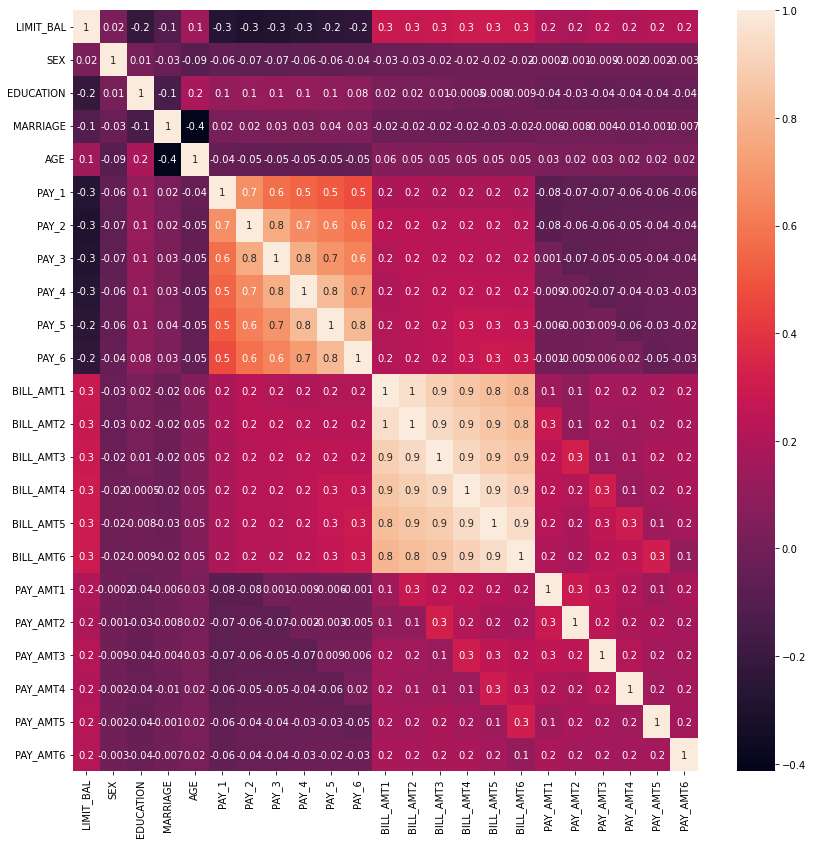

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

BILL_AMT1 ~ BILL_AMT6, 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음을 알 수 있다.  
<Br>
이 **BILL_AMT1 ~ BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환**한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 알아보겠다.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명 : ', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성 : ', pca.explained_variance_ratio_)

대상 속성명 :  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 :  [0.90555253 0.0509867 ]


단 2개의 PCA 컴포넌트만으로도 **6개 속성의 변동성을 약 95% 이상 설명**할 수 있으며  
특히 **첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높다.**  
<br>
이번에는 **원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교**해 보겠다..

In [14]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV = 3 인 경우의 개별 fold세트별 정확도 : ', scores)
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

CV = 3 인 경우의 개별 fold세트별 정확도 :  [0.8083 0.8196 0.8232]
평균 정확도 : 0.8170


**3개의 교차 검증 세트에서 평균 예측 정확도는 약 81.7%를 나타냈다.**  
<br>
이번에는 **6개의 컴포넌트로 PCA 변환한 데이터 세트에서 동일하게 분류 예측을 적용**해 보겠다.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardSacler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score() 로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도 : ', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도 : {0:.4f}'.format(np.mean(scores_pca)))

**전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한  
분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하**만 발생했다.  
전체 속성의 1/4 정도만으로도 이정도 수치의 예측 성능을 유지할 수 있다는 것은  
**PCA의 뛰어난 압축 능력을 잘 보여주는 것**이라고 할 수 있다.  

## LDA(Linear Discriminent Analysis)  
  
### LDA 개요
**LDA(선형판별분석)** : 선형 판별 분석법(=PCA와 유사)
 - 특징  
     1) 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소  
     2) **지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원 축소.**  
     3) **클래스 간 분산은 최대한 크게** 가져가고, **클래스 내부의 분산은 최대한 작게** 가져가는 방식.  
     <br>
     
 - LDA를 구하는 스텝  
     1) 클래스 내부와 클래스 간 분산 행렬을 구한다.(입력 데이터의 결정 값 클래스벼로 개별 피처의 평균 벡터 기반)  
     2) 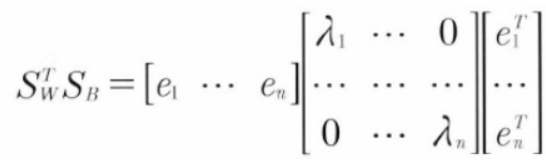
     3) 고유값이 가장 큰 순으로 k개(LDA변환 차수만큼) 추출.  
     4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환.

### 붓꽃 데이터 세트에 LDA 적용하기  
붓꽃 데이터 세트를 시이킷런의 LDA를 이용해 변환하고, 그 결과를 품종별로 시각화해 보겠다.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

In [ ]:
## LDA 변환된 입력 데이터 값으로 2차원 평면에 품종별로 표현해 보겠다.

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

# setosa는 세모, versicolor는 네모, verginica는 동그라미로 표현
markers=['^','s','o']

#setosa는 세모, versicoler는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker= marker, label=iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

LDA로 변환된 붓꽃 데이터 세트를 시각화해보면 PCA로 변환된 데이터와 좌우 대칭 형태로 많이 닮아있음을 알 수 있다.  
<br>
**주의할 점** : LDA는 데이터의 Target값 클래스끼리 최대한 분리할 수 있는 축을 찾는다. 즉, PCA와 다르게 지도학습 분류이므로 fit할 때, target값을 입력해주어야 한다.

## SVD(singular Value Decomposition)  


### SVD 개요  
넘파이의 SVD를 이용해 SVD 연산을 수행하고, SVD로 분해가 어떤 식으로 되는지 간단한 예쩨를 통해 살펴보겠다.

In [ ]:
# 넘파이의 SVD 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

In [ ]:
## a 행렬에 SVD를 적용해 U, sigma, Vt를 도출.

U, Sigma, Vt= svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix :\n', np.round(U,3))
print('\n')
print('Sigma Value :\n', np.round(Sigma, 3))
print('\n')
print('Vt transpose matrix:\n', np.round(Vt,3))

In [ ]:
## 위를 이용해 다시 원본 행렬로 정확히 복원되는지 확인

# Sigma를 다시 0을 포함한 대칭행렬로 변환(0이 아닌 값만 1차원으로 추출했으므로)
Sigma_mat= np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat), Vt)
print(np.round(a_, 3))

원본 행렬 a와 동일하게 복원이 되었다.  
<br>
이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보겠다.

In [ ]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

a 행렬은 이전과 다르게 로우 간 관계가 매우 높아졌다. 이 데이터를 SVD로 다시 분해해 보겠다.

In [ ]:
U, Sigma, Vt= svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value : \n', np.round(Sigma, 3))

이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변했다.(Rank=2)  
<br>
이번에는 U, Sigma, Vt의 전체 데이터를 이용하지 않고 Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원해 보겠다.

In [ ]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

이번에는 **Truncated SVD**를 이용해 행렬을 분해해 보겠다.  
Truncated SVD : Sigma 행렬의 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식.  
 -> 인위적으로 더 작은 차원으로 분해하기 때문에 원본 행렬을 정확하게 다시 복원할 수 없지만 상당 수준으로 원본 행렬 근사 가능.  
 

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬 : \n', matrix)
print('\n')

U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n 분해 행렬 차원 : ', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬 : ', Sigma)

# truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원 : ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬 :', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬 : \n', matrix_tr)

Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있다.

### 사이킷런 TruncatedSVD 클래스를 이용한 변환  
다음 코드를 입력해 붓꽃 데이터 세트를 TruncatedSVD를 이용해 변환해 보겠다.

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

p 425

TruncatedSVD 변환 역시 PCA와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로  
뛰어난 고유성을 가지고 있음을 알 수 있다.  
<br>
사이킷런의 TruncatedSVD와 PCA 클래스 구현을 조금 더 자세히 들여다보면 두 개 클래스 모두 SVD를 이용해 행렬을 분해한다.  
붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스 변환을 해보면 두 개가 거의 동일함을 알 수 있다.

In [ ]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 실제로 비교해 보면 거의 같음을 알 수 있다.

In [ ]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ -tsvd.components_).mean())

모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있다.  
즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다.

## NMF(Non-Negative Matrix Factorization)  
  
### NMF 개요  
**NMF**는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형이다.  
원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 다음과 같이 좀 더 간단하게 두개의 기반 양수 행렬로  
분해될 수 있는 기법을 지칭한다.  
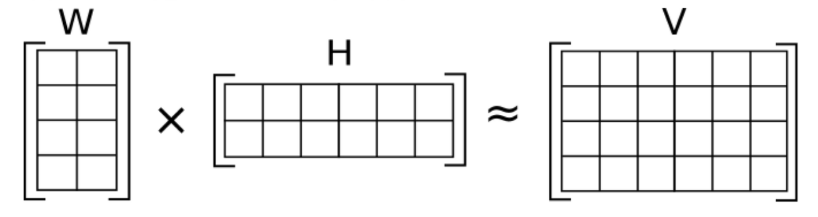  
<br>
분해 행렬 W : 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지 대응.  
분해 행렬 H : 이 잠재 요소가 원본 열로 어떻게 구성됐는지를 나타내는 행렬.

NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 **이미지 변한 및 압축, 텍스트의 토픽 도출 등**의  
영역에서 사용되고 있다.  
<br>
붓꽃데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 이를 시각화해 보겠다.

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터리에 잘 사용된다.  
